In [0]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Different sizes benchmark

In [0]:
sizes = np.arange(0, 25000, 5000)
times_axis_1 = np.zeros_like(sizes)
times_plain  = np.zeros_like(sizes)

In [5]:
for i, size in enumerate(sizes):
    print(size)
    x1 = np.arange(size * size).reshape(size, size)
    x2 = np.arange(size * size).reshape(size, size)
    
    t0 = time()
    x1 = np.roll(x1, -1, axis=1)
    times_axis_1[i] = time() - t0
    
    t0 = time()
    x2 = np.roll(x2, -1)
    times_plain[i] = time() - t0

0
5000
10000
15000
20000


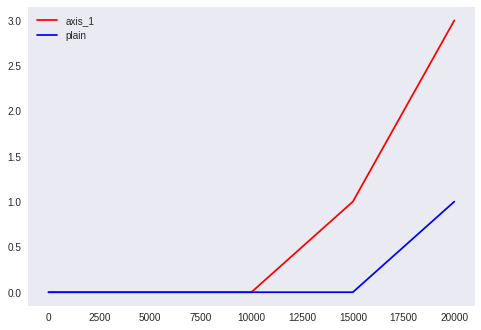

In [6]:
plt.plot(sizes, times_axis_1, 'r', label='axis_1')
plt.plot(sizes, times_plain, 'b', label='plain')
plt.grid()
plt.legend()

# `1920 x 1080` benchmark

In [0]:
x = np.random.random((1920, 1080))
n = 100
times_axis_1 = np.zeros(n)
times_plain  = np.zeros(n)

In [0]:
for i in range(n):
    print(i)
    
    t0 = time()
    x = np.roll(x, -1, axis=1)
    times_axis_1[i] = time() - t0
    
    t0 = time()
    x = np.roll(x, -1)
    times_plain[i] = time() - t0

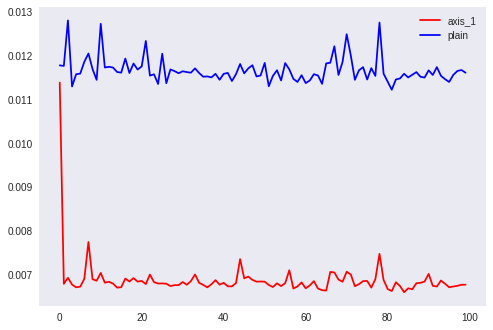

In [13]:
plt.plot(times_axis_1, 'r', label='axis_1')
plt.plot(times_plain, 'b', label='plain')
plt.grid()
plt.legend()

# cupy.roll vs numpy.roll (`1920 x 1080`)

In [0]:
%%capture
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install cupy-cuda80

In [0]:
import cupy as cp

In [0]:
x_np = np.random.random((1920, 1080))
x_cp = cp.random.random((1920, 1080))

n = 100
times_numpy = np.zeros(n)
times_cupy  = np.zeros(n)

In [17]:
for i in range(n):
    print(i, end=' ')
    
    t0 = time()
    x_np = np.roll(x_np, -1, axis=1)
    times_numpy[i] = time() - t0
    
    t0 = time()
    x_cp = cp.roll(x_cp, -1, axis=1)
    times_cupy[i] = time() - t0

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

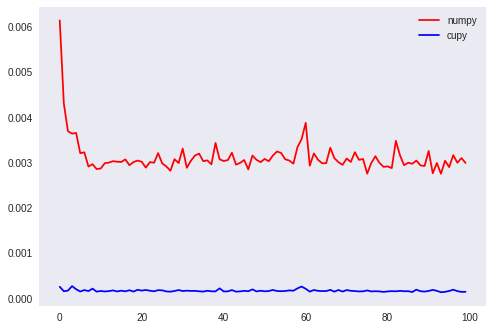

In [18]:
plt.plot(times_numpy, 'r', label='numpy')
plt.plot(times_cupy, 'b', label='cupy')
plt.grid()
plt.legend()

# cupy `axis=1` vs plain

In [0]:
x = cp.random.random((1920, 1080))
n = 1000
times_axis_1 = np.zeros(n)
times_plain  = np.zeros(n)

In [0]:
for i in range(n):
    
    t0 = time()
    x = cp.roll(x, -1, axis=1)
    times_axis_1[i] = time() - t0
    
    t0 = time()
    x = cp.roll(x, -1)
    times_plain[i] = time() - t0

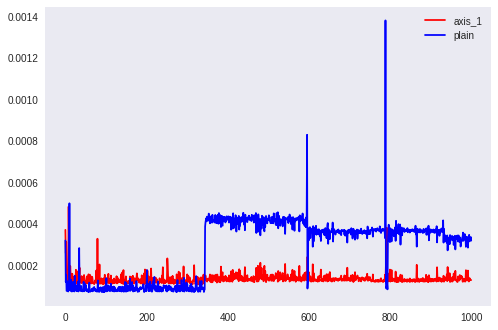

In [27]:
plt.plot(times_axis_1, 'r', label='axis_1')
plt.plot(times_plain, 'b', label='plain')
plt.grid()
plt.legend()